## Whole-Brain (Organ) Analysis of Sensitivity vs. Precision Results

These scripts perform analysis and visualization of segmentation results at the **whole-brain level**. They are based on sensitivity and precision values extracted from experiments (e.g., with the Frangi filter) and aim to identify optimal parameter settings for each MRI series.

### Script 1 – Select Closest Point to Ideal (1,1)

This script calculates the **Euclidean distance** between each point (`sensitivity`, `precision`) and the ideal value `(1,1)`. It selects the point with the **smallest distance** per `SerieName`, assuming it reflects the best trade-off between true positive rate and positive predictive value.

**Steps:**
- Load the `Frangi_Beta_Organ.csv` file.
- Convert sensitivity and precision to numeric format.
- Compute the distance to `(1, 1)` for each entry.
- Select the row with the minimum distance per `SerieName`.
- Save the results to `Organ_filtered_min_values_by_SerieName.csv`.

---

### Script 2 – Plot Sensitivity vs. Precision for Each Volume

This script generates **sensitivity vs. precision plots** for each `SerieName`, using different colors to represent each `VolumeName`. This enables visual inspection of segmentation performance across volumes and parameter settings.

**Steps:**
- Load the same CSV file.
- For each `SerieName`, create a line plot.
- Plot each `VolumeName` curve with distinct colors and markers.
- Add legend, title, and grid.
- Display all plots interactively.

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('Frangi_Beta_Organ.csv')

# Ensure 'sensitivity' and 'precision' are numeric
df['sensitivity'] = pd.to_numeric(df['sensitivity'], errors='coerce')
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')

# Compute Euclidean distance to (1, 1)
df['result'] = np.sqrt((df['sensitivity'] - 1)**2 + (df['precision'] - 1)**2)

# Get rows with the minimum distance per SerieName
min_indices = df.loc[df.groupby('SerieName')['result'].idxmin()]

# Filter original DataFrame
df_filtered = df.loc[min_indices.index]

# Save the filtered results to a new CSV file
df_filtered.to_csv('Organ_filtered_min_values_by_SerieName.csv', index=False)

# Show a preview of the results
print(df_filtered.head())

                 SerieName VolumeName  Threshold     TP  TN       FP  FN  \
110010  Frangi_Beta/AAA417   A0.1.nii        0.0  20656   0  4879578   0   
10000   Frangi_Beta/AFH292   A0.1.nii        0.0  24056   0  4609415   0   
210020  Frangi_Beta/CBV387   A0.1.nii        0.0  26107   0  3917087   0   
310030  Frangi_Beta/FBR001   A0.1.nii        0.0  27226   0  4306646   0   
410040  Frangi_Beta/GPI693   A0.1.nii        0.0   6116   0  4042296   0   

        sensitivity  specificity  precision  accuracy      Dice  MCC      snr  \
110010          1.0          0.0   0.004215  0.004215  0.008395  0.0  29.0197   
10000           1.0          0.0   0.005192  0.005192  0.010330  0.0  33.1638   
210020          1.0          0.0   0.006621  0.006621  0.013154  0.0  34.1549   
310030          1.0          0.0   0.006282  0.006282  0.012486  0.0  34.7931   
410040          1.0          0.0   0.001511  0.001511  0.003017  0.0  35.3457   

           psnr    result  
110010  31.0326  0.995785  


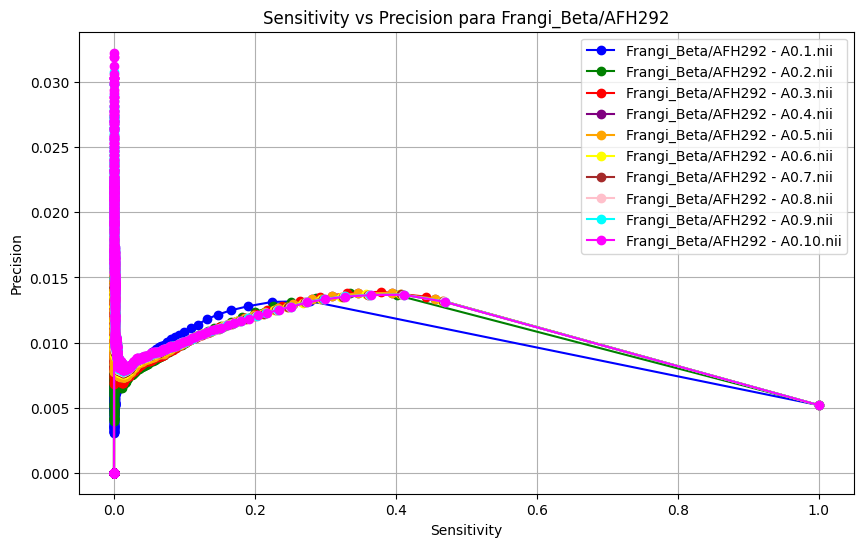

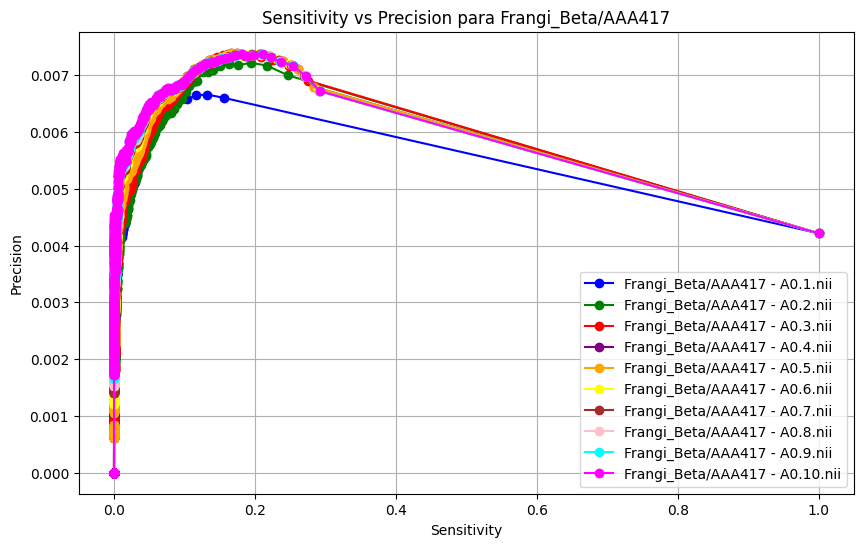

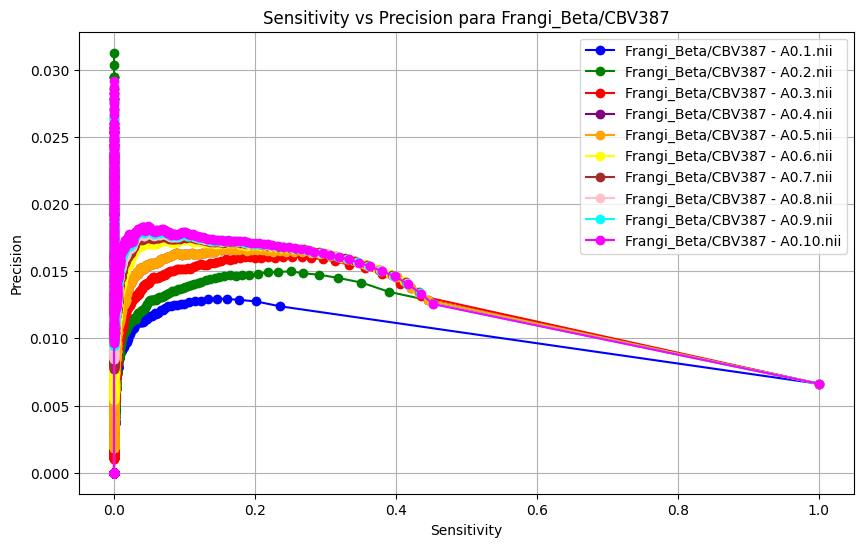

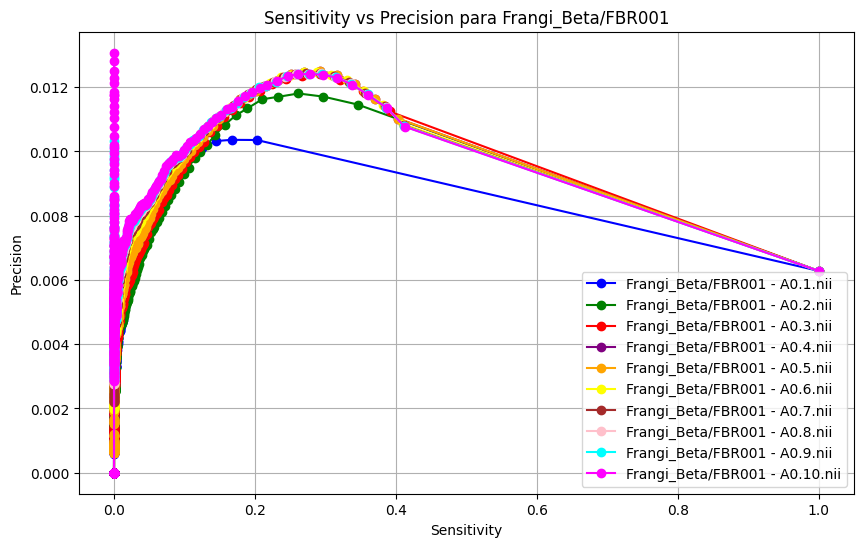

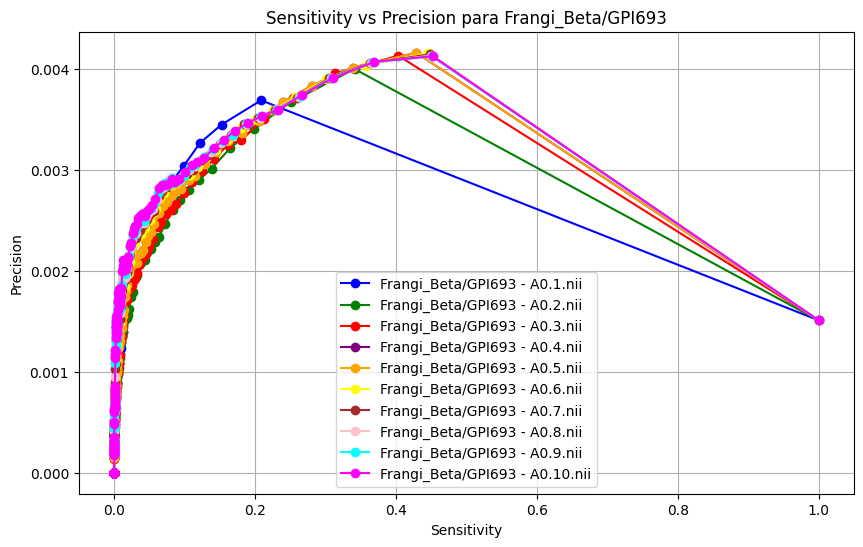

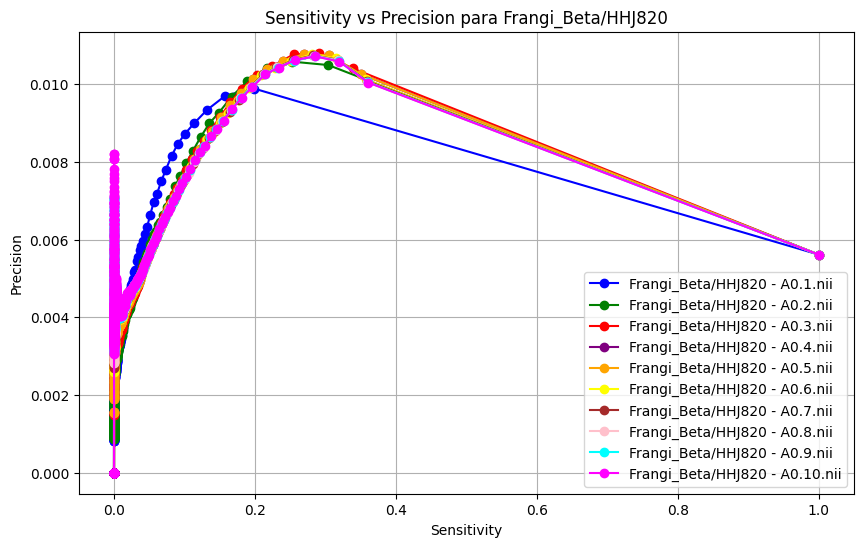

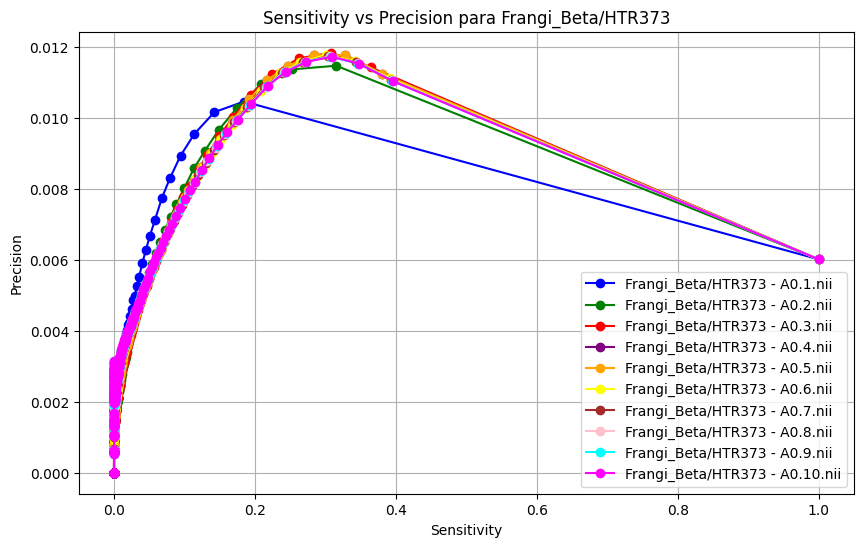

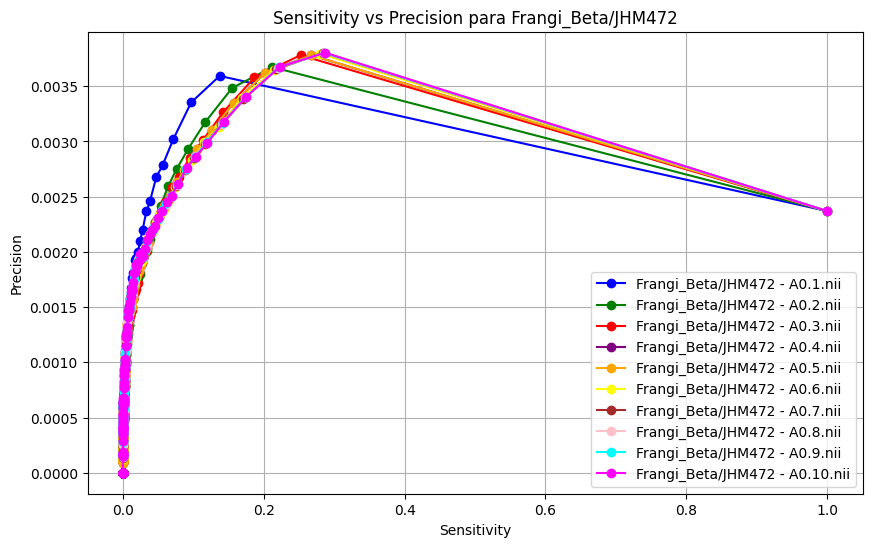

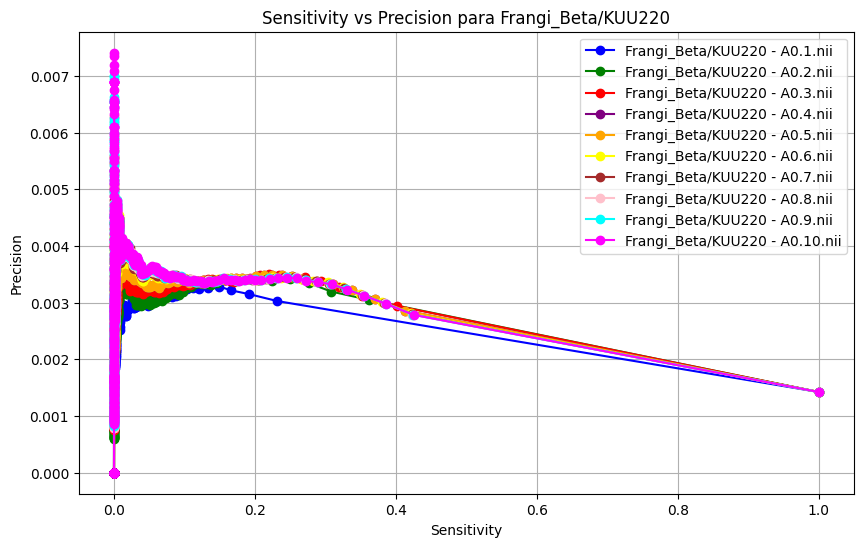

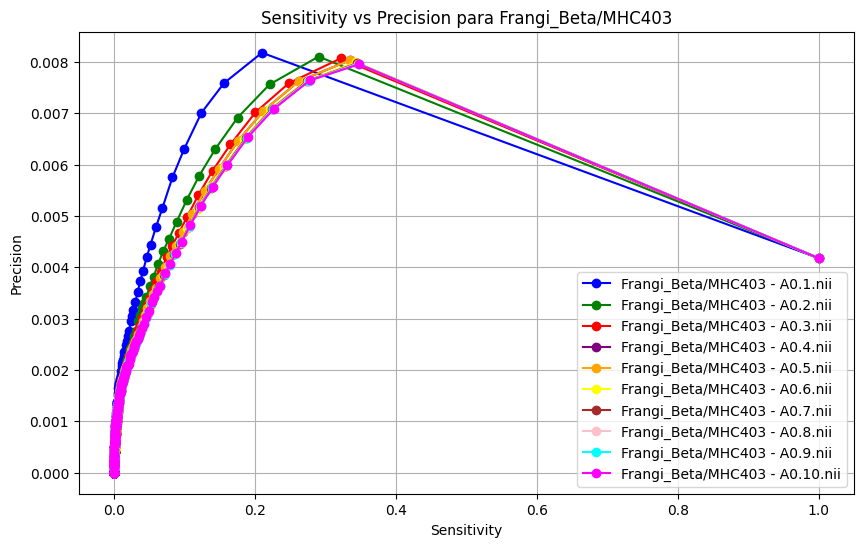

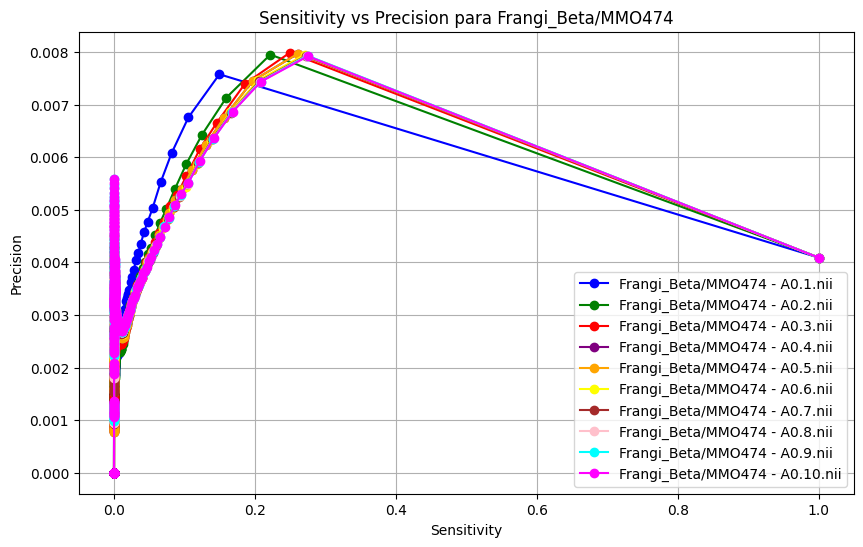

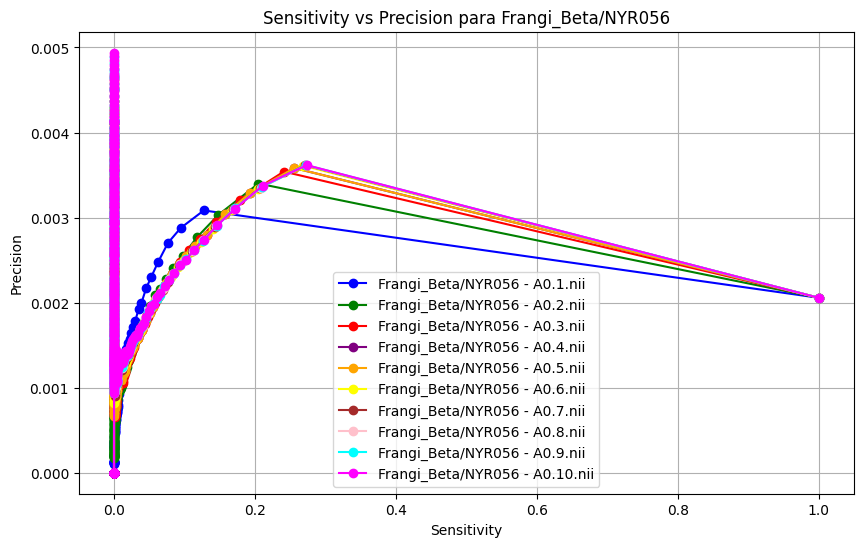

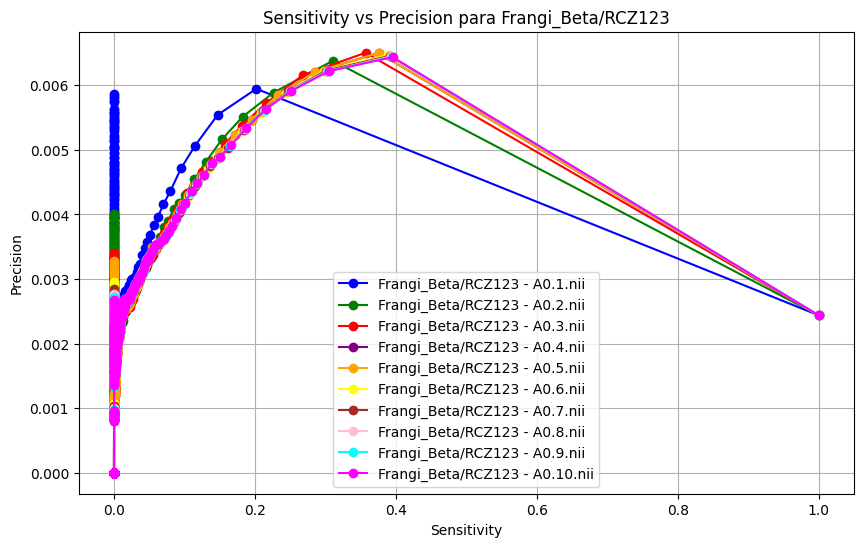

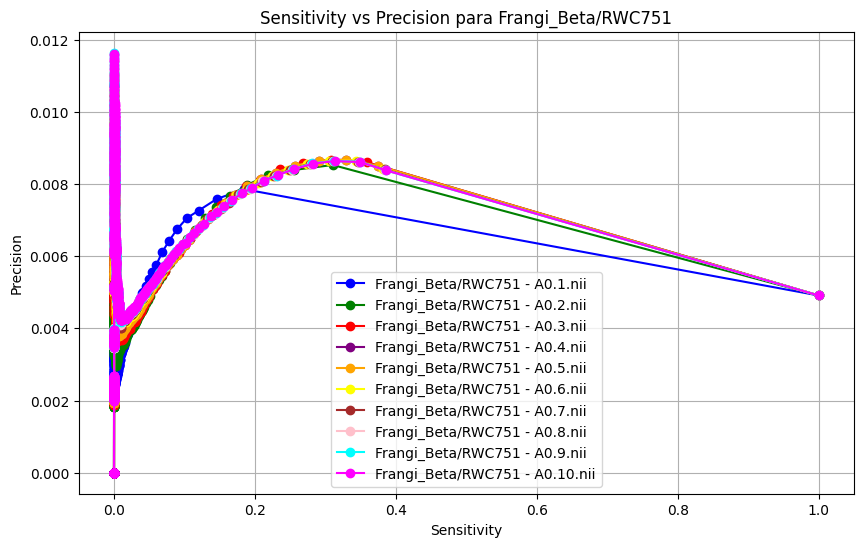

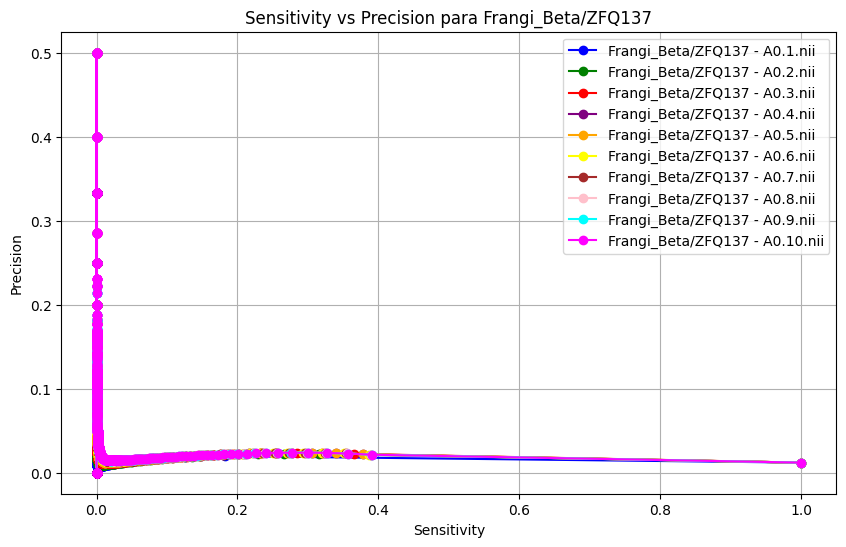

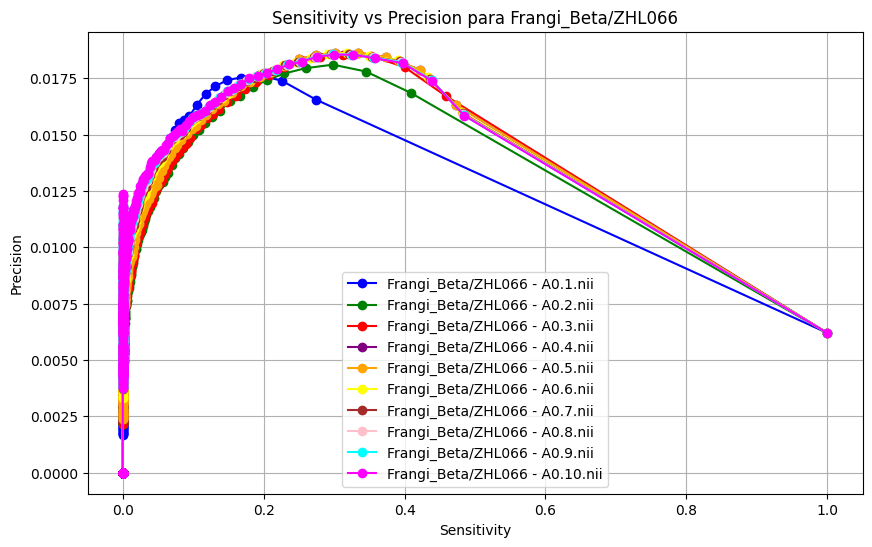

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Frangi_Beta_Organ.csv')

# Ensure 'sensitivity' and 'precision' are numeric
df['sensitivity'] = pd.to_numeric(df['sensitivity'], errors='coerce')
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')

# Get unique SerieNames
serie_names = df['SerieName'].unique()

# Predefined list of 10 colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan', 'magenta']

# Generate a plot for each SerieName
for i, serie_name in enumerate(serie_names):
    # Filter by SerieName
    filtered_df = df[df['SerieName'] == serie_name]

    # Create a figure
    plt.figure(figsize=(10, 6))

    # Plot each VolumeName using a different color
    volume_names = filtered_df['VolumeName'].unique()
    for j, volume_name in enumerate(volume_names):
        volume_df = filtered_df[filtered_df['VolumeName'] == volume_name]
        color = colors[j % len(colors)]  # Cycle through colors
        plt.plot(volume_df['sensitivity'], volume_df['precision'], marker='o', linestyle='-', color=color, label=f'{serie_name} - {volume_name}')

    # Set title and labels
    plt.title(f'Sensitivity vs Precision for {serie_name}')
    plt.xlabel('Sensitivity')
    plt.ylabel('Precision')

    # Add legend and grid
    plt.legend(loc='best')
    plt.grid(True)

    # Show the plot
    plt.show()